# Decision tree pour le Diabete G

## Importation des librairies

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler


## Appel du dataset et affichage de l'entete

In [2]:
df=pd.read_csv('diabetes.csv')
df=df.head(40)
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Exploration des donnees

## Affichage de la typologie des features

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               40 non-null     int64  
 1   Glucose                   40 non-null     int64  
 2   BloodPressure             40 non-null     int64  
 3   SkinThickness             40 non-null     int64  
 4   Insulin                   40 non-null     int64  
 5   BMI                       40 non-null     float64
 6   DiabetesPedigreeFunction  40 non-null     float64
 7   Age                       40 non-null     int64  
 8   Outcome                   40 non-null     int64  
dtypes: float64(2), int64(7)
memory usage: 2.9 KB


# Dimension des donnees

In [4]:
df.shape

(40, 9)

### 768 lignes et 9 colonnes

## Affichage des differentes valeur du target

In [5]:
df["Outcome"].value_counts()

1    22
0    18
Name: Outcome, dtype: int64

## Description statistique du dataset

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,40.000000,40.000000,40.00000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000
mean,5.525000,125.375000,69.67500,19.700000,94.17500,31.360000,0.503300,38.200000,0.550000
std,3.616114,31.360344,21.23421,17.194513,165.20087,8.054933,0.415934,11.618288,0.503831
min,0.000000,78.000000,0.00000,0.000000,0.00000,0.000000,0.134000,21.000000,0.000000
25%,2.750000,102.750000,66.00000,0.000000,0.00000,26.975000,0.247250,29.750000,0.000000
50%,5.000000,117.500000,74.00000,23.000000,0.00000,31.350000,0.409000,33.000000,1.000000
75%,8.250000,143.500000,80.50000,35.000000,141.50000,36.725000,0.560000,50.000000,1.000000
max,13.000000,197.000000,96.00000,47.000000,846.00000,45.800000,2.288000,60.000000,1.000000


## Recherche des valeurs manquante et les donnees dupliquer

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Aucune valeur manquante

In [8]:
df.duplicated().sum()

0

### Aucune valeur duplique

# Traitement des donnees

## Visualisation des donnnees

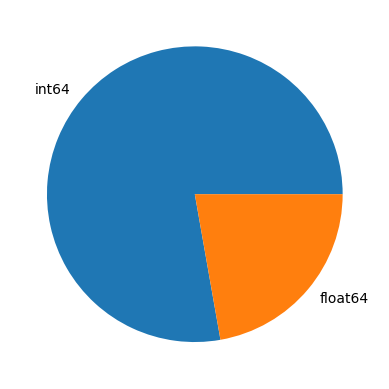

In [9]:
df.dtypes.value_counts().plot.pie()
plt.show()

#### Visualisation univariée

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


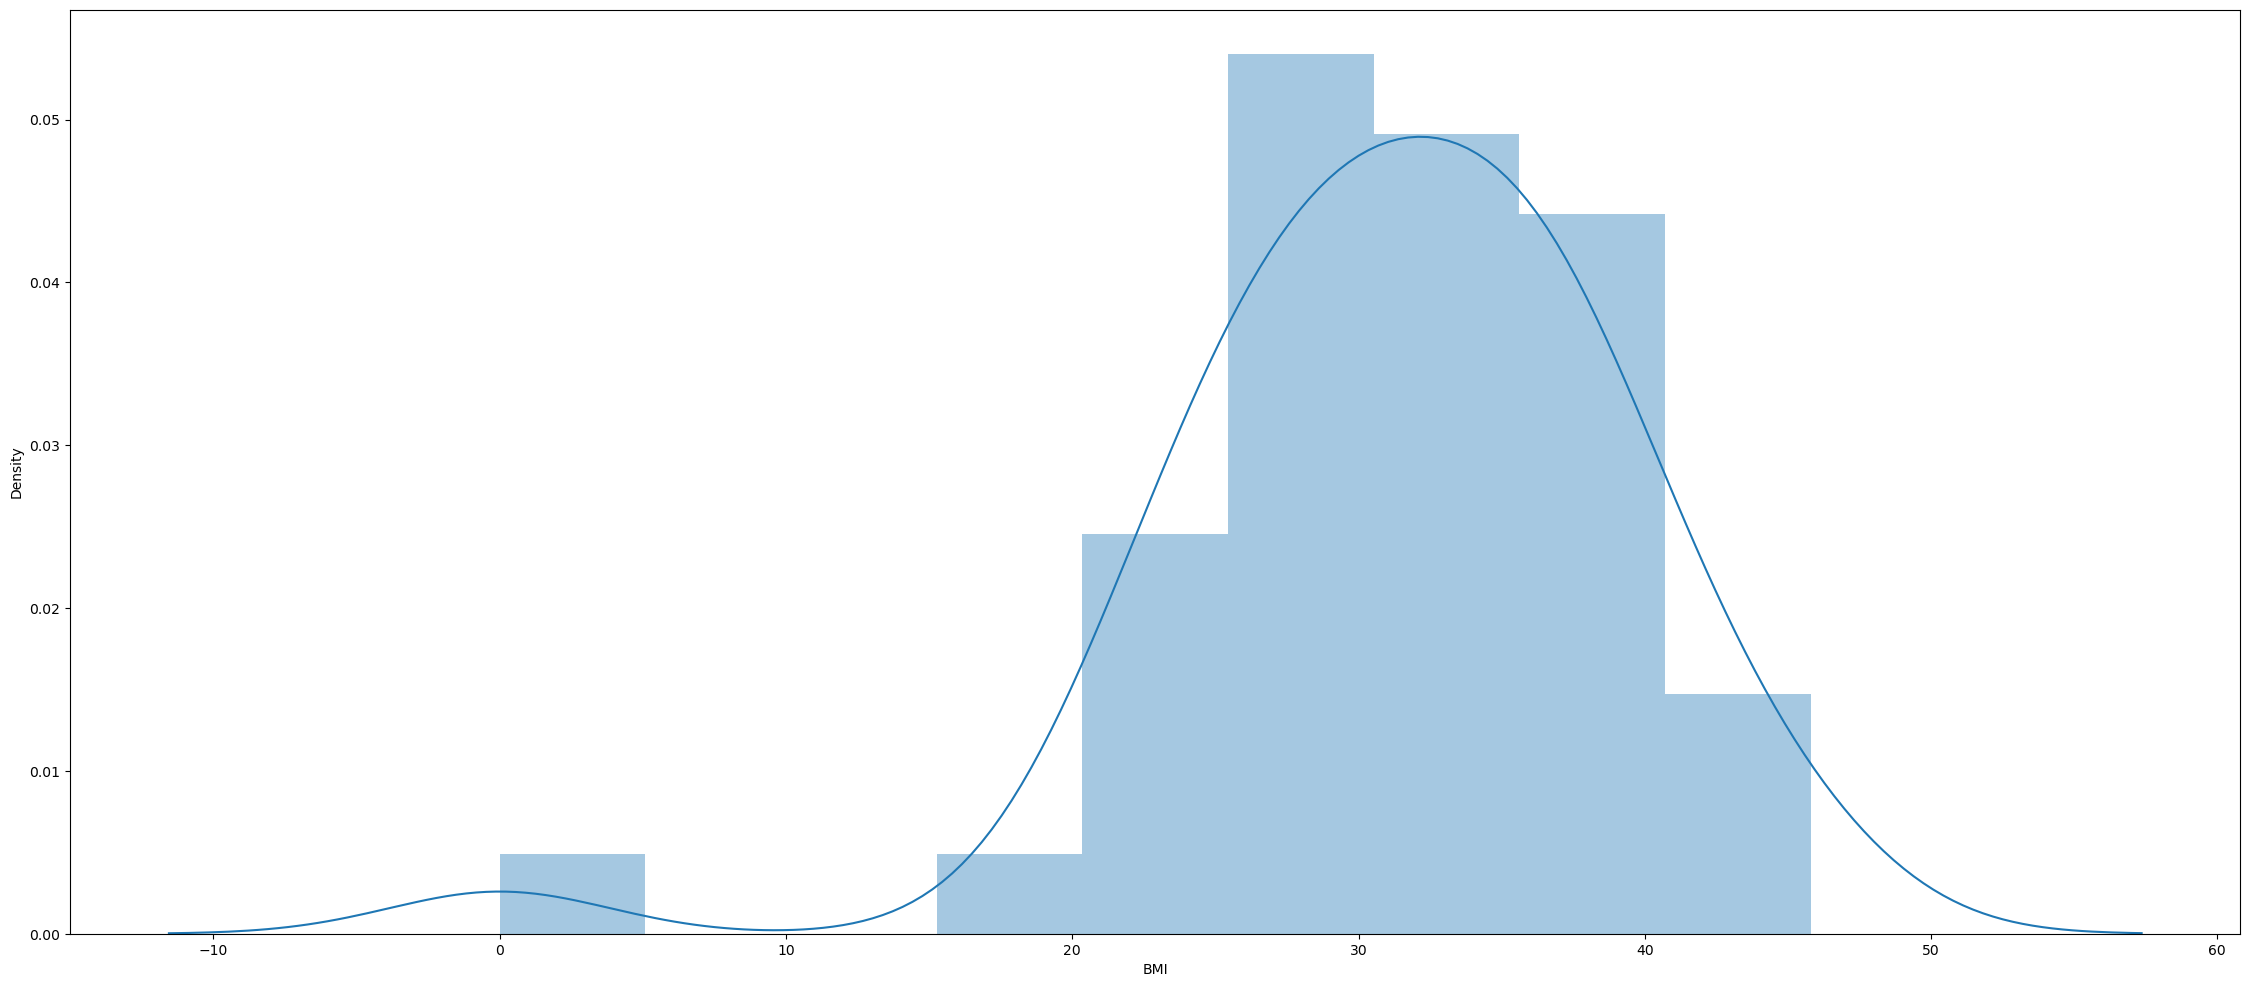

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


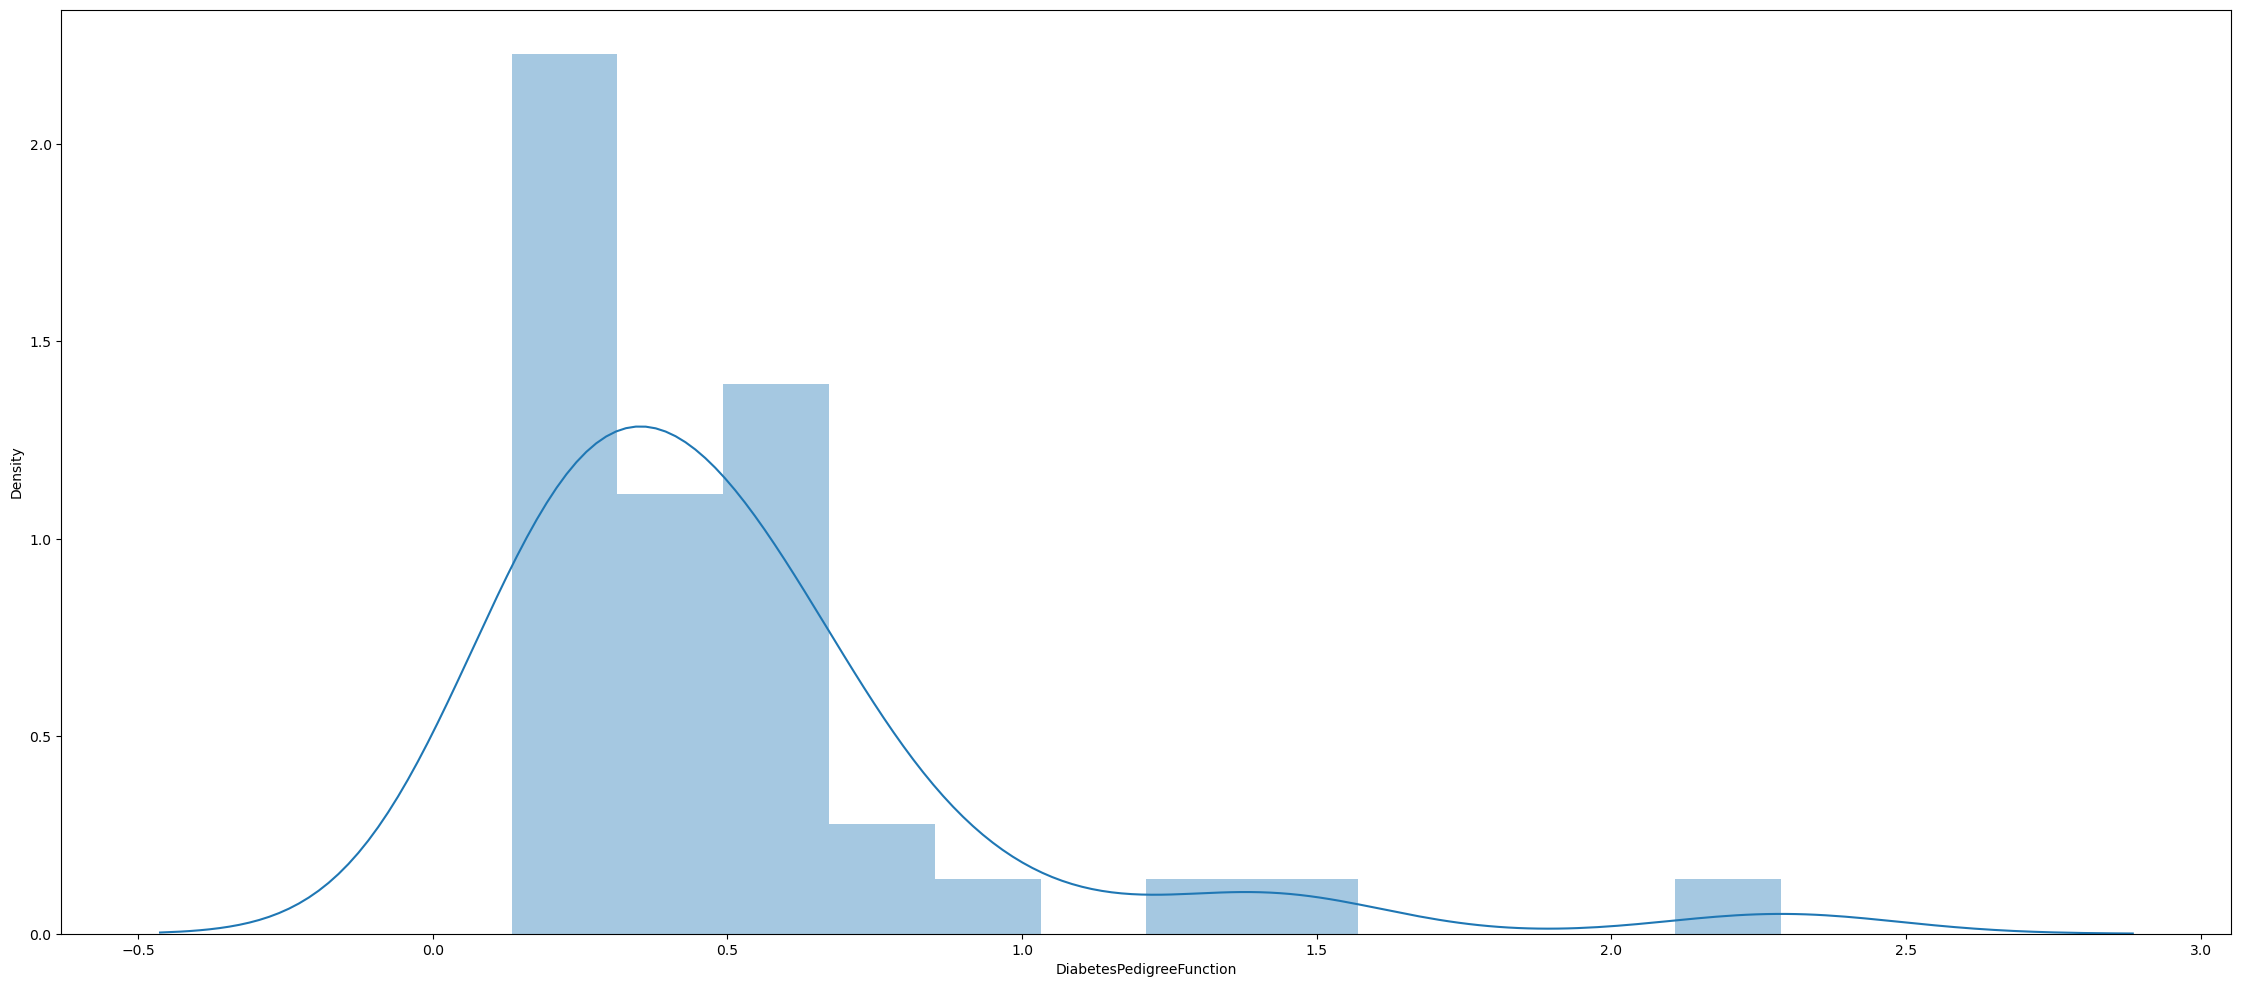

In [11]:
for col in df.select_dtypes('float'):
    plt.figure(figsize=(28,12))
    sns.distplot(df[col])
    plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


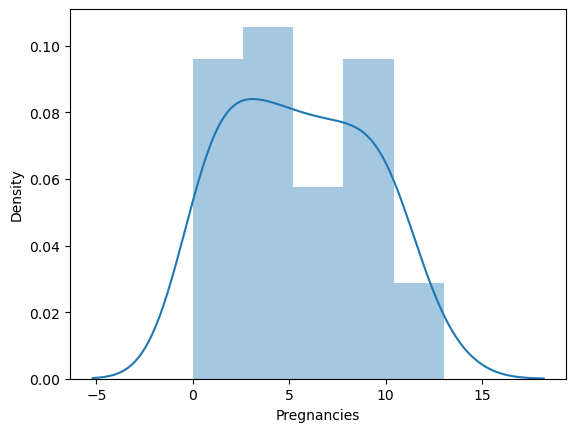

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


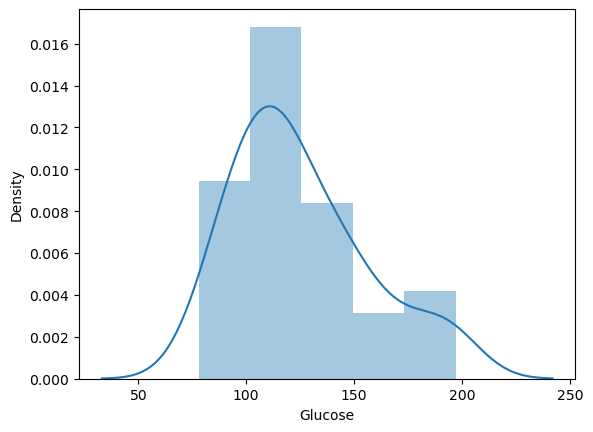

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


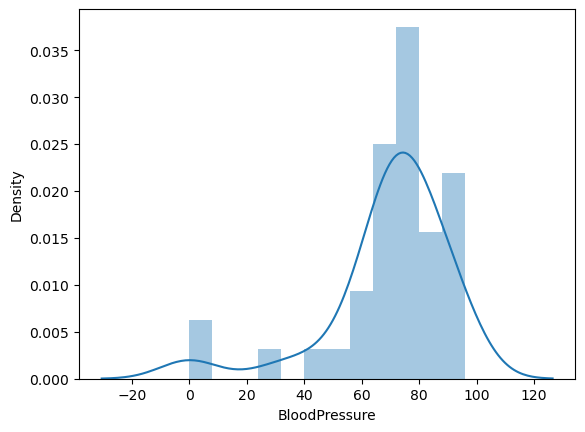

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


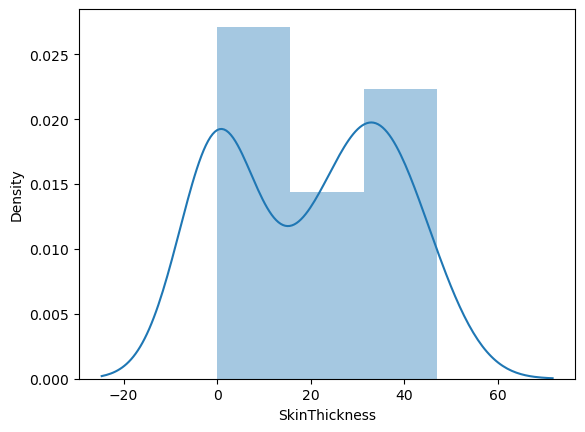

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


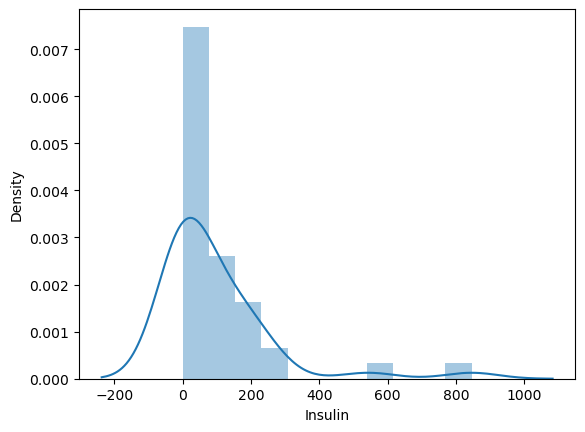

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


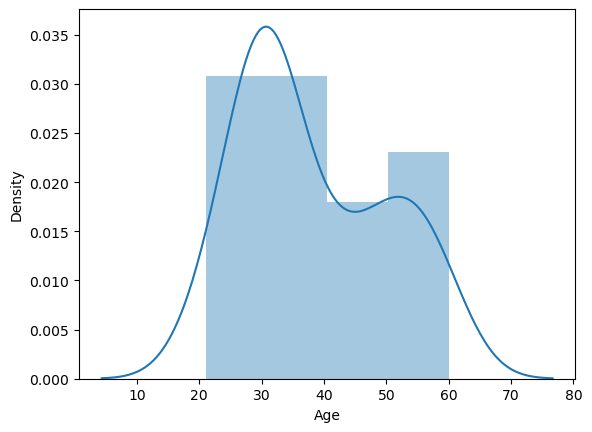

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


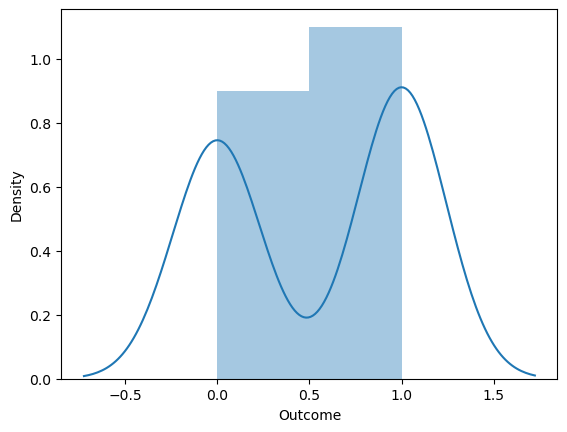

In [12]:
for col in df.select_dtypes('int'):
    plt.plot(figsize=(28,12))
    sns.distplot(df[col])
    plt.show()

#### En visualisant les courbes, on remarque que toute les distributions sont anormales. Nous devons donc standardiser

### Visualisation bivariée

In [13]:
Malade = df[df['Outcome']==1]
Sain = df[df['Outcome']==0]

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


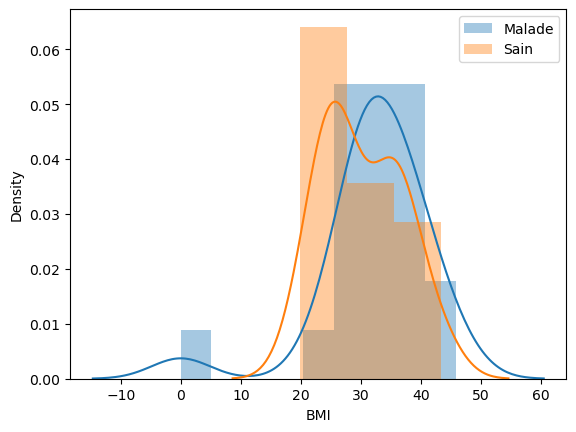

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


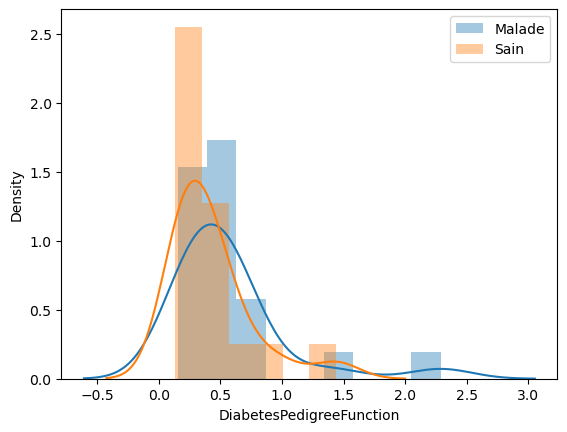

In [14]:
for col in df.select_dtypes('float'):
    sns.distplot(Malade[col], label = 'Malade')
    sns.distplot(Sain[col], label = 'Sain')
    plt.legend()
    plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


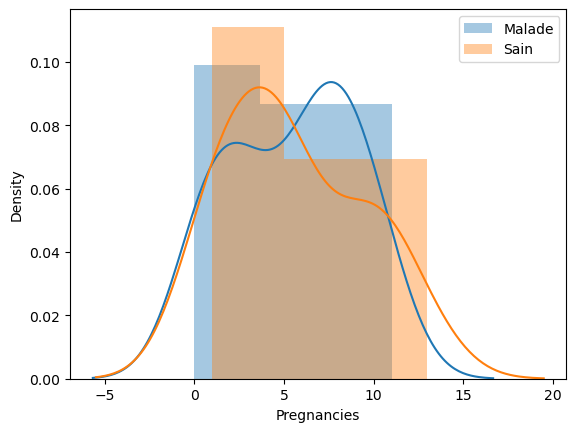

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


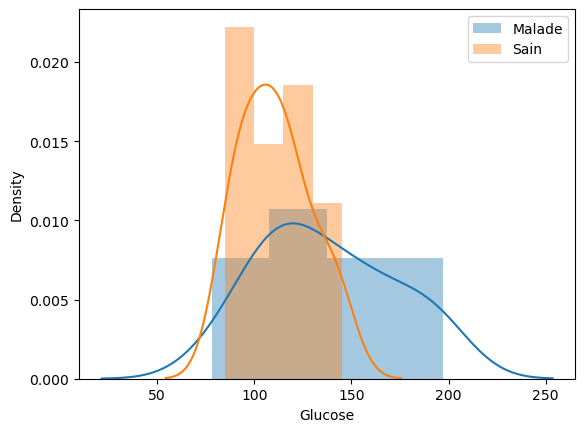

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


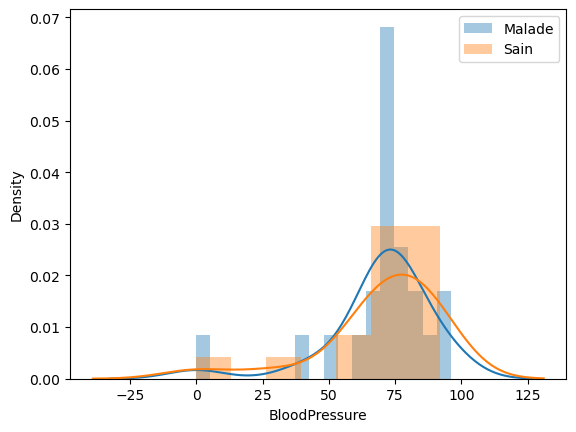

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


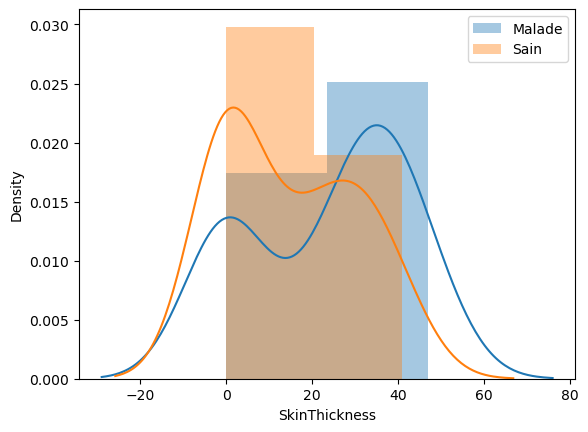

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


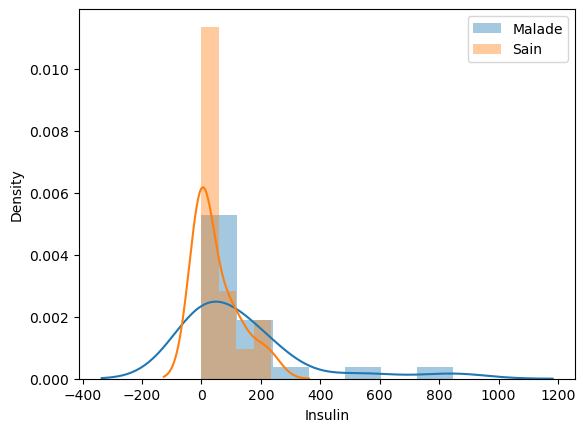

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


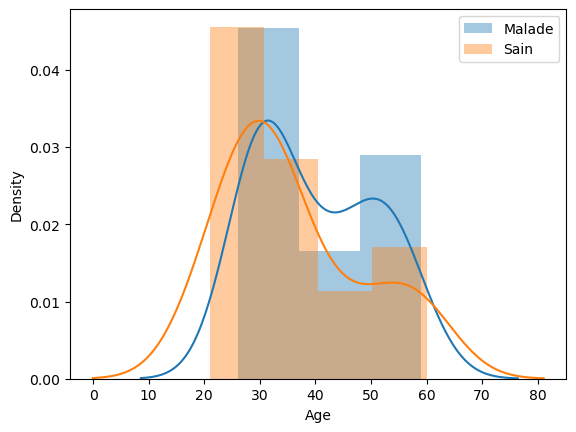

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:316

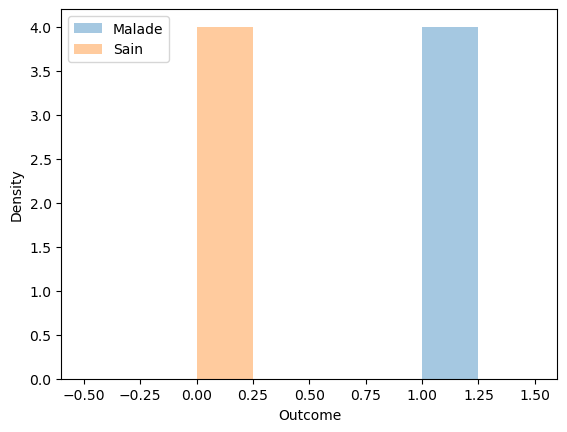

In [15]:
for col in df.select_dtypes('int'):
    sns.distplot(Malade[col], label = 'Malade')
    sns.distplot(Sain[col], label = 'Sain')
    plt.legend()
    plt.show()

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler=MinMaxScaler()

In [12]:
def identify_outliers(df, threshold=1.5):
    q25,q75=np.percentile(df,25),np.percentile(df,75)
    iqr= q75-q25
    lower_bound, upper_bound= q25-threshold*iqr , q75+threshold*iqr
    return (df< lower_bound) | (df>upper_bound)
outliers= identify_outliers(df)

print(" indices des valeurs aberrantes:", np.where(outliers)[0])

 indices des valeurs aberrantes: [ 2  4  8  8 11 13 13 14 14 16 20 22 31 31 35 39]


In [13]:
# Définition de la classe pour les nœuds de l'arbre de décision
class TreeNode:
    def __init__(self, depth, max_depth):
        self.depth = depth
        self.max_depth = max_depth
        self.feature_index = None
        self.threshold = None
        self.left = None
        self.right = None
        self.value = None

In [14]:
# Fonction pour calculer l'entropie d'un ensemble de données
def entropy(y):
    classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    entropy_value = -np.sum(probabilities * np.log2(probabilities + 1e-10))
    return entropy_value

In [15]:
# Fonction pour diviser les données en deux en fonction d'une caractéristique et d'un seuil
def split_data(X, y, feature_index, threshold):
    left_mask = X[:, feature_index] <= threshold
    right_mask = ~left_mask
    return X[left_mask], y[left_mask], X[right_mask], y[right_mask]

In [16]:
# Fonction pour calculer le gain d'information lors de la division des données
def information_gain(y, y_left, y_right):
    parent_entropy = entropy(y)
    left_entropy = entropy(y_left)
    right_entropy = entropy(y_right)

    num_samples = len(y)
    num_samples_left = len(y_left)
    num_samples_right = len(y_right)

    gain = parent_entropy - (num_samples_left / num_samples) * left_entropy - (num_samples_right / num_samples) * right_entropy
    return gain

In [17]:
# Fonction pour trouver la meilleure division d'une caractéristique
def find_best_split(X, y):
    m, n = X.shape
    if m <= 1:
        return None, None

    num_classes = len(np.unique(y))
    if num_classes == 1:
        return None, None

    current_entropy = entropy(y)
    best_gain = 0.0
    best_feature_index = None
    best_threshold = None

    for feature_index in range(n):
        thresholds = np.unique(X[:, feature_index])
        for threshold in thresholds:
            X_left, y_left, X_right, y_right = split_data(X, y, feature_index, threshold)

            if len(y_left) == 0 or len(y_right) == 0:
                continue

            gain = information_gain(y, y_left, y_right)

            if gain > best_gain:
                best_gain = gain
                best_feature_index = feature_index
                best_threshold = threshold

    return best_feature_index, best_threshold

In [18]:
# Fonction recursive pour la construction de l'arbre de decision a partir des donnees d'entrainement
def build_tree(X, y, depth, max_depth, feature_names=None):
    num_samples_per_class = [np.sum(y == i) for i in np.unique(y)]
    predicted_class = np.argmax(num_samples_per_class)
    node = TreeNode(depth, max_depth)

    if depth < max_depth:
        feature_index, threshold = find_best_split(X, y)

        if feature_index is not None:
            X_left, y_left, X_right, y_right = split_data(X, y, feature_index, threshold)
            node.feature_index = feature_index
            node.threshold = threshold
            node.left = build_tree(X_left, y_left, depth + 1, max_depth, feature_names)
            node.right = build_tree(X_right, y_right, depth + 1, max_depth, feature_names)

    if node.left is None and node.right is None:
        node.value = predicted_class

    return node

In [19]:
# Fonction pour affiche l'arbre de decision
def display_tree(node, feature_names, depth=0, prefix="Root: "):
    if node is not None:
        feature_name = feature_names[node.feature_index] if node.feature_index is not None else "Leaf"
        print("  " * depth + prefix + f"Depth {node.depth}, Feature {feature_name}, Threshold {node.threshold}")
        if node.value is not None:
            print("  " * (depth + 1) + f"Predicted Class: {node.value}")
        else:
            display_tree(node.left, feature_names, depth + 1, "Left: ")
            display_tree(node.right, feature_names, depth + 1, "Right: ")

In [20]:
# Fonction pour prédire la classe d'un échantillon en traversant l'arbre de décision
def predict_sample(tree, sample):
    if tree.value is not None:
        return tree.value
    else:
        if sample[tree.feature_index] <= tree.threshold:
            return predict_sample(tree.left, sample)
        else:
            return predict_sample(tree.right, sample)


In [21]:
# Séparer les caractéristiques (X) de la cible (y)
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values
feature_names = df.drop('Outcome', axis=1).columns

In [22]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [24]:
# Définir la taille de l'ensemble de test (par exemple, 20%)
test_size = 0.5

# Calculer le nombre d'échantillons pour l'ensemble de test
num_test_samples = int(test_size * len(X))

# Séparer les données en ensembles d'entraînement et de test manuellement
X_train = X[:-num_test_samples]
y_train = y[:-num_test_samples]
X_test = X[-num_test_samples:]
y_test = y[-num_test_samples:]

# Appeler votre fonction d'arbre de décision (par exemple, build_tree)
# avec X_train, y_train et les noms de caractéristiques pour entraîner le modèle
root = build_tree(X_train, y_train, depth=1, max_depth=10, feature_names=feature_names)

In [25]:
# Afficher l'arbre de décision avec les noms de caractéristiques
print("Arbre de décision:")
display_tree(root, feature_names)

# Effectuer les prédictions
predictions = [predict_sample(root, sample) for sample in X_test]


Arbre de décision:
Root: Depth 1, Feature DiabetesPedigreeFunction, Threshold 0.031104921077065924
  Left: Depth 2, Feature Glucose, Threshold 0.31932773109243695
    Left: Depth 3, Feature Leaf, Threshold None
      Predicted Class: 0
    Right: Depth 3, Feature Leaf, Threshold None
      Predicted Class: 0
  Right: Depth 2, Feature BMI, Threshold 0.591703056768559
    Left: Depth 3, Feature BMI, Threshold 0.5633187772925765
      Left: Depth 4, Feature Leaf, Threshold None
        Predicted Class: 0
      Right: Depth 4, Feature Leaf, Threshold None
        Predicted Class: 0
    Right: Depth 3, Feature Leaf, Threshold None
      Predicted Class: 0



Accuracy: 0.55

Matrice de Confusion:
[[11  0]
 [ 9  0]]
Taux de bonnes prédictions : 55.00%
    Vraies Valeurs  Prédictions
0                0            0
1                0            0
2                1            0
3                1            0
4                1            0
5                1            0
6                1            0
7                0            0
8                0            0
9                0            0
10               0            0
11               1            0
12               0            0
13               0            0
14               0            0
15               0            0
16               0            0
17               1            0
18               1            0
19               1            0


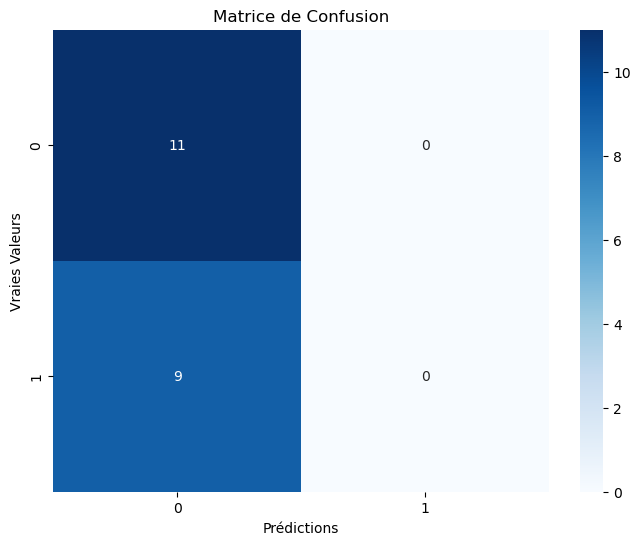

In [32]:
# Évaluation du modèle
accuracy = np.sum(predictions == y_test) / len(y_test)
print(f"\nAccuracy: {accuracy}")


# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, predictions)

# Afficher la matrice de confusion
print("\nMatrice de Confusion:")
print(conf_matrix)

# Effectuer les prédictions
predictions = [predict_sample(root, sample) for sample in X_test]

# Calculer le taux de bonnes prédictions en pourcentage
accuracy_percentage = accuracy_score(y_test, predictions) * 100
print(f"Taux de bonnes prédictions : {accuracy_percentage:.2f}%")

# Créer un DataFrame avec les valeurs cibles et les prédictions
result_df = pd.DataFrame({'Vraies Valeurs': y_test, 'Prédictions': predictions})

# Afficher le DataFrame
print(result_df)

# Afficher la matrice de confusion avec seaborn et matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies Valeurs')
plt.show()

In [26]:
def confusion_matrix(y_test, predictions):
   

    # Initialisation des valeurs dans la matrice de confusion
    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0

    # Parcours des prédictions et des valeurs réelles
    for true_val, pred_val in zip(y_test, predictions):
        # Cas où la prédiction et la valeur réelle sont toutes deux égales à 1
        if true_val == 0 and pred_val == 0:
            true_positive += 1
        # Cas où la prédiction et la valeur réelle sont toutes deux égales à 0
        elif true_val == 1 and pred_val == 1:
            true_negative += 1
        # Cas où la valeur réelle est 0 et la prédiction est 1
        elif true_val == 0 and pred_val == 1:
            false_positive += 1
        # Cas où la valeur réelle est 1 et la prédiction est 0
        elif true_val == 1 and pred_val == 0:
            false_negative += 1

    # Construction de la matrice de confusion
    conf_matrix = [
        [true_positive, false_positive],
        [false_negative, true_negative]
    ]

    return conf_matrix


matrice_conf = confusion_matrix(y_test, predictions)

# Affichage de la matrice de confusion
for row in matrice_conf:
    print(row)


[11, 0]
[9, 0]
